In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
wnba = pd.read_csv('WNBA Stats.csv')

## 1. Sampling Error

In [22]:
parameter = wnba["Games Played"].max()
sample = wnba['Games Played'].sample(30,random_state = 1)
statistic = sample.max()

sampling_error = parameter - statistic
sampling_error

2

## 2. Simple Random Sampling

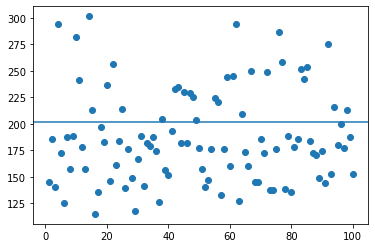

In [23]:
sample_means = []
for i in range(100):
    sample_means.append(wnba["PTS"].sample(10,random_state=i).mean())


population_mean =wnba["PTS"].mean()
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

## 3. The Importance of Sample Size

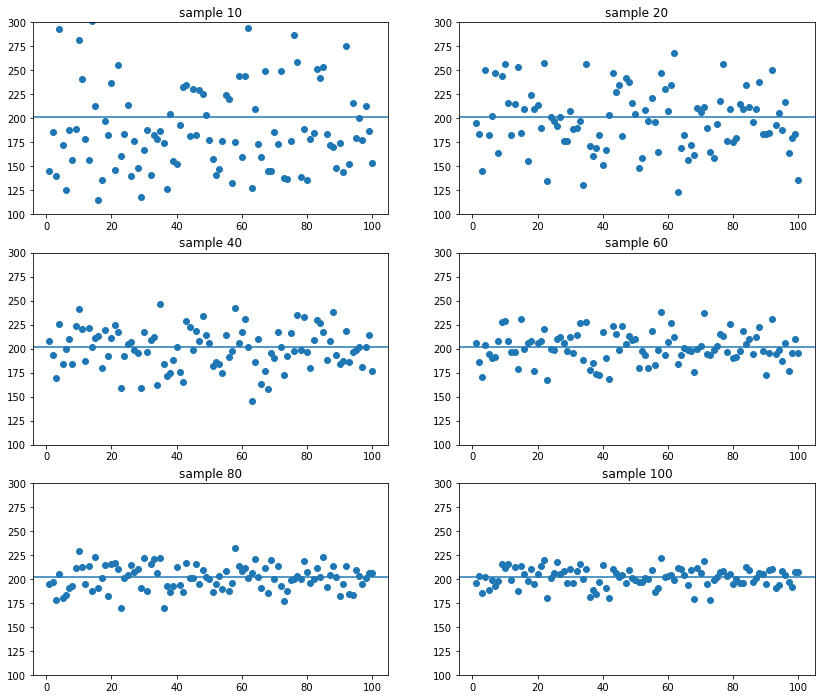

In [24]:
plt.figure(figsize=(14, 12))
sample_means = []
a = 10
for j in range(1,7):
    plt.subplot(3,2,j)
    for i in range(100):
        sample_means.append(wnba["PTS"].sample(a,random_state=i).mean())
    population_mean =wnba["PTS"].mean()
    plt.scatter(range(1,101), sample_means)
    plt.axhline(population_mean)
    plt.title(f'sample {a}')
    plt.ylim([100,300])
    
    if a >= 20:
        a += 20
    else:
        a += 10
    sample_means.clear()

## 4. Stratified Sampling

In [25]:
# determining which position scores the highest number of points per game
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)
position_most_points

'C'

## 5. Proportional Stratified Sampling

In [26]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


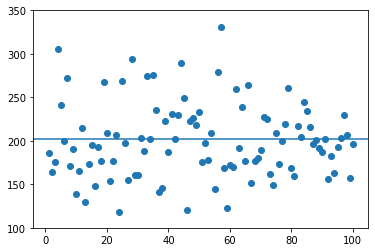

In [27]:
# Performing stratified sampling on the data set 100 times, and sampling strata proportionally.

under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.ylim([100,350])
plt.show()

The variability of the sampling is quite large, and many sample means are unrepresentative, being far from the population mean. 

## 6. Choosing the Right Strata

In [28]:
print(wnba['MIN'].value_counts(bins = 3, normalize = True))

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64


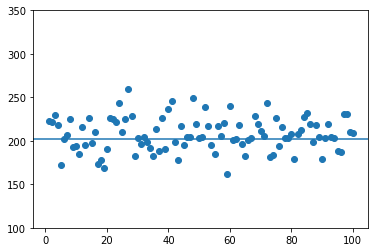

In [29]:
under_347 = wnba[wnba['MIN'] <= 347.667]
btw_347_682 = wnba[(wnba['MIN'] > 347.333) & (wnba['MIN'] <=682.667)]
over_682 = wnba[wnba['MIN'] > 682.667]


stratification = []

for i in range(1,101):
    min1 = under_347['PTS'].sample(4,random_state = i)
    min2 = btw_347_682['PTS'].sample(4,random_state = i)
    min3 = over_682['PTS'].sample(4,random_state = i)
    
    final_sample = pd.concat([min1,min2,min3])
    
    stratification.append(final_sample.mean())

plt.scatter(range(1,101), stratification)
plt.axhline(wnba['PTS'].mean())
plt.ylim([100,350])
plt.show()

## 7. Cluster Sampling

In [30]:
# We must keep in mind is that we should avoid picking a cluster twice.
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

In [31]:
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_height

-0.06400121617511445

In [32]:
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_age

-1.401337792642142

In [33]:
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_BMI

0.23095444165950596

In [34]:
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()
sampling_error_points

-27.79674673152934